Metodologia a usar:
- CRISP-DM

Intengrantes:
- Jehu Aravena
- Nicolas Montecinos

In [1]:
from tensorflow import keras
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

### CRISP-DM
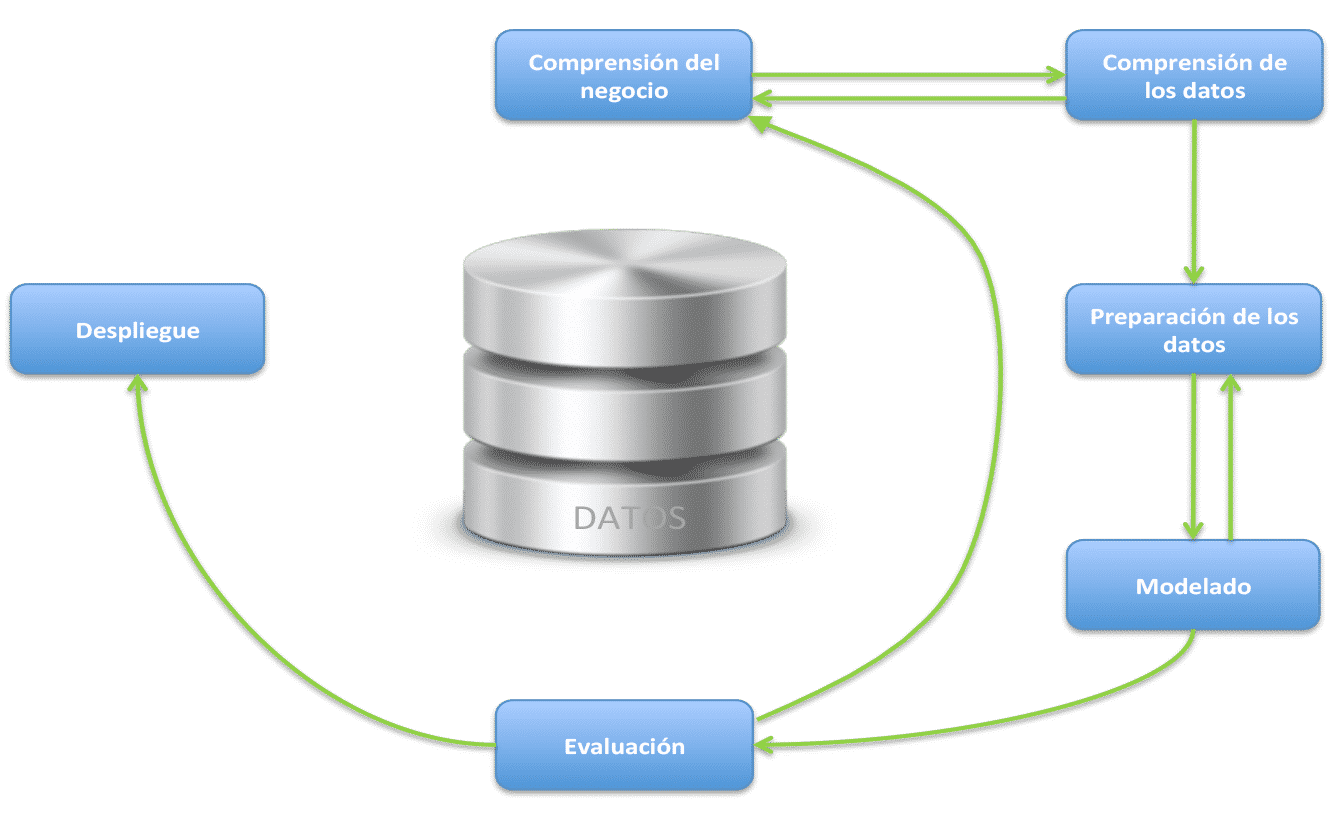

# Comprensión del negocio

El Gobierno de Chile busca implementar inteligencia artificial en su página web mediante el etiquetado de imágenes de distintos dominios. El objetivo principal del proyecto es seleccionar y clasificar imágenes, detectar objetos, estados de ánimo y rostros. Para lograr esto, se utilizarán técnicas de inteligencia artificial, como el Aprendizaje Automático, que permite a las computadoras aprender y generalizar patrones a partir de conocimiento previo.

Dentro del Aprendizaje Automático, se empleará el Aprendizaje Activo para mejorar la precisión y el rendimiento de los modelos de predicción. En este caso, se utilizará el conjunto de datos CIFAR-10, el cual consta de 60,000 imágenes en color de 32x32 píxeles, distribuidas en 10 clases con 6,000 imágenes por clase. Hay 50,000 imágenes para entrenamiento y 10,000 imágenes para pruebas. El conjunto de datos se divide en cinco lotes de entrenamiento y un lote de prueba, con 1,000 imágenes seleccionadas al azar de cada clase en el lote de prueba. Los lotes de entrenamiento contienen las imágenes restantes, con exactamente 5,000 imágenes de cada clase, aunque algunos lotes pueden tener más imágenes de una clase que de otra.

# Comprensión de los datos

El siguiente código carga el conjunto de datos CIFAR-10 y muestra una cuadrícula de imágenes de prueba. Cada imagen se etiqueta con su clase correspondiente, representada por un título en la cuadrícula. Se utilizan funciones de la biblioteca matplotlib.pyplot para configurar la visualización, como desactivar las divisiones de ejes y ocultar las etiquetas de los ejes. La cuadrícula de imágenes proporciona una representación visual de las muestras del conjunto de datos CIFAR-10, lo que permite una comprensión rápida de las imágenes y sus etiquetas.

170498071/170498071 [==============================] - 6s 0us/step


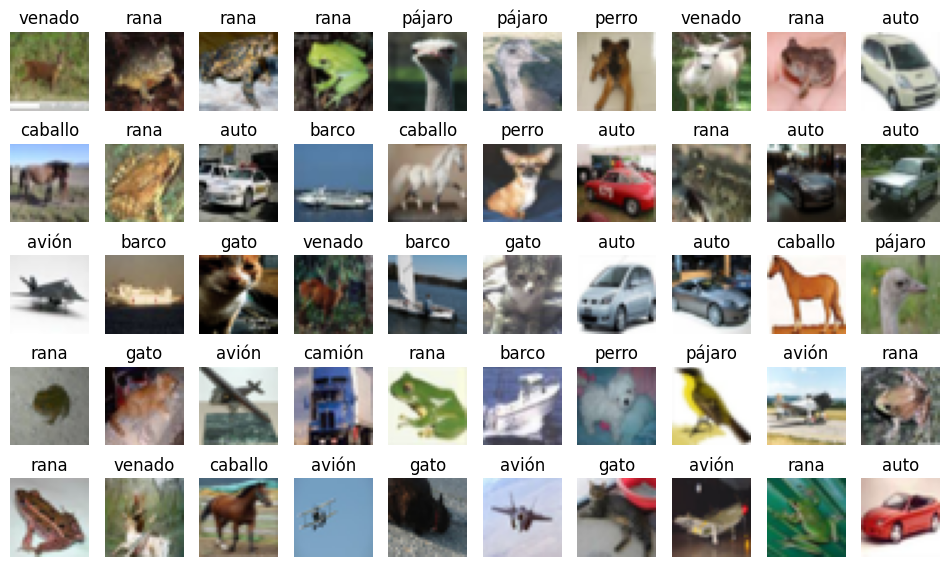

In [2]:
(imgs_train,labs_train), (imgs_test,labs_test) = keras.datasets.cifar10.load_data() # carga de datos

nombres = ['avión', 'auto', 'pájaro', 'gato', 'venado', 'perro', 'rana', 'caballo', 'barco', 'camión'] # nombres de las clases

h = 5 # alto de la cuadricula
w = 10 # ancho de la cuadricula
fig, axs = plt.subplots(h, w, figsize=(w+2, h+2)) # creación de la cuadricula
for i in range(h): # recorre las filas
  for j in range(w): # recorre las columnas
    ex = np.random.randint(len(imgs_test)) # elige un ejemplo al azar
    axs[i,j].set_title(nombres[labs_test[ex][0]]) # título de la imagen
    axs[i,j].imshow(imgs_test[ex]) # muestra la imagen
    axs[i,j].axis('off') # quita las rallitas de los ejes
plt.show()


Como se puede observar, el dataset está conformado por una serie de imágenes etiquetadas y de baja resolución. A simple vista, se pueden identificar nombres de clases como:
- Venado
- Caballo
- Camión
- Rana
- Avión
- Gato
- Perro
- Pájaro
- Auto
- Barco

Las imágenes no parecen tener ningún orden de distribución en particular.

## Categoria de las imagenes

Afortunadamente, las categorías de las imágenes tienen la misma cantidad de datos, por lo que no es necesario realizar un balanceo de los datos. Como se mencionó anteriormente, cada categoría tiene un total de 6,000 datos. Estos datos están distribuidos en lotes de 10,000, que se utilizarán para el entrenamiento.

## Dimensiones

En el conjunto de datos CIFAR-10, cada imagen tiene una resolución de 32x32 píxeles y tres canales de color (RGB). Por lo tanto, las dimensiones de los datos de entrenamiento y prueba son (50,000, 32, 32, 3) y (10,000, 32, 32, 3), respectivamente. En cuanto a las etiquetas, las dimensiones de las etiquetas de entrenamiento y prueba son (50,000, 10) y (10,000, 10), respectivamente. Estas dimensiones son esenciales para comprender la estructura de los datos y etiquetas en el conjunto CIFAR-10 y se utilizan en operaciones y análisis posteriores en el proceso de modelado y evaluación.

In [3]:
# Inspetion de los datos
print('Conjunto X')
print('Dimensiones de los datos de entrenamiento:', imgs_train.shape) # dimensiones de los datos de entrenamiento
print('Dimensiones de los datos de prueba:', imgs_test.shape) # dimensiones de los datos de prueba
print('\nConjunto Y')
print('Dimensiones de las etiquetas de entrenamiento:', labs_train.shape) # dimensiones de las etiquetas de entrenamiento
print('Dimensiones de las etiquetas de prueba:', labs_test.shape) # dimensiones de las etiquetas de prueba

Conjunto X
Dimensiones de los datos de entrenamiento: (50000, 32, 32, 3)
Dimensiones de los datos de prueba: (10000, 32, 32, 3)

Conjunto Y
Dimensiones de las etiquetas de entrenamiento: (50000, 1)
Dimensiones de las etiquetas de prueba: (10000, 1)


# Preparación de los datos

Debido a que se trabaja con imágenes, estas deben ser transformadas a un formato que pueda ser procesado por el modelo. Para lograr esto, se utilizan las bibliotecas Keras y TensorFlow, las cuales permiten cargar el conjunto de datos CIFAR-10 y transformar las imágenes a un formato adecuado para el procesamiento. Además, se realiza una normalización de los datos para que los valores de los píxeles estén en el rango de [0, 1].

In [4]:
X_train = imgs_train.reshape(50000,32*32*3) # cantidad de ejemplos, tamaño de la imagen
X_test = imgs_test.reshape(10000,32*32*3)  # lo mismo para el conjunto de test
X_train = X_train / 255 # normalización
X_test = X_test / 255 # lo mismo para el conjunto de test

Y_train = keras.utils.to_categorical(labs_train, 10) # convierte las etiquetas a categóricas
Y_test = keras.utils.to_categorical(labs_test, 10) # lo mismo para el conjunto de test


In [5]:
M_train = X_train.shape[0]
M_test = X_test.shape[0]

N = X_train.shape[1]
C = Y_train.shape[1]

print(N,C,M_train,M_test)

3072 10 50000 10000


En el código proporcionado se establece la arquitectura y los parámetros de entrenamiento de la red feed-forward. La capacidad de la red se configura mediante el número de neuronas en cada capa oculta. Se definen tres capas ocultas con 530, 400 y 160 neuronas respectivamente, asignadas a las variables x1, x2 y x3.

Además, se especifica el número de épocas de entrenamiento (e) como 20, lo que indica la cantidad de veces que el modelo se ajustará a todos los datos de entrenamiento. También se establece el tamaño del lote (b) en 128, lo que significa que durante el entrenamiento se utilizarán lotes de 128 muestras a la vez para actualizar los pesos de la red.

Con esta configuración, la red feed-forward está lista para ser entrenada y evaluar su rendimiento en el conjunto de datos correspondiente.

Para realizar una mayor variedad de pruebas, se han realizado variantes en los parámetros seleccionados para las neuronas y el tamaño del lote. Por el momento, el número de épocas no se modificará debido a las demandas específicas del caso.

In [6]:
#Variantes B2
x1 = 530 # cantidad de neuronas de la capa oculta 1
x2 = 400 # cantidad de neuronas de la capa oculta 2
x3 = 160  # cantidad de neuronas de la capa oculta 3

e1 = 20 # cantidad de épocas
b1 =128 # tamaño del batch (tamaño del conjunto de entrenamiento que se usa en cada época)

Observacion 1: el numero de batch size no vario de manera sustancial a pesar de reducir a la mitad el batch_size.

# Modelado

### Modelo 1

En el siguiente modelo, se utilizó el método de activación tanh. Inicialmente se consideró utilizar batch normalization y dropout como métodos definitivos, pero aunque se realizaron pruebas, se decidió mantener el método de activación tal como está para observar su comportamiento normal. Sin embargo, cabe destacar que tanh, a pesar de ser una de las funciones a probar, no es la más recomendable para nuestro caso específico. Aunque los datos están restringidos en el rango de [0,1], con esta función de activación, los datos de salida estarán en el rango [-1,1]. En los primeros entrenamientos, se está utilizando el optimizador "sgd" como base. También resaltamos el hecho de que la prueba de tanh se realizó con 2 capas ocultas en vez de 3.


In [7]:
#sgd ademas de tanh activation

np.random.seed(30) # semilla para reproducibilidad
tf.random.set_seed(30) # semilla para reproducibilidad


red = keras.Sequential() # modelo secuencial
red.add(keras.layers.Dense(x1, input_dim=N, activation='tanh')) # capa oculta 1
 # dropout 1
red.add(keras.layers.Dense(x2, activation='tanh')) # capa oculta 2




red.add(keras.layers.Dense(C, activation='softmax')) # capa de salida

red.summary() # imprime un resumen de la red

red.compile( # compilación de la red
    loss='categorical_crossentropy', # función de pérdida
    optimizer='sgd', # optimizador
    metrics=['accuracy'] # métrica a mostrar
)

hist_reg1 = red.fit(X_train, Y_train, # entrenamiento de la red
        epochs=e1, # cantidad de épocas
        batch_size=b1, # tamaño del batch
        validation_data=(X_test,Y_test) # conjunto de validación
       )

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 530)               1628690   
                                                                 
 dense_1 (Dense)             (None, 400)               212400    
                                                                 
 dense_2 (Dense)             (None, 10)                4010      
                                                                 
Total params: 1,845,100
Trainable params: 1,845,100
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
391/391 [==============================] - 8s 7ms/step - loss: 1.9449 - accuracy: 0.3069 - val_loss: 1.8223 - val_accuracy: 0.3572
Epoch 2/20
391/391 [==============================] - 2s 5ms/step - loss: 1.8009 - accuracy: 0.3675 - val_loss: 1.7696 - val_accuracy: 0.3788
Epoch 3/20
391/391 [======

### Modelo 2

En el siguiente modelo estamos utilizando la función de activación ReLU junto con el optimizador SGD. Para el optimizador, utilizamos los siguientes parámetros: learning_rate, momentum, decay y nesterov. Se ajustó un número bajo para el learning rate, ya que aunque el entrenamiento sea más lento, al no ignorar el mínimo global, hay una mayor posibilidad de que el modelo se ajuste de manera más precisa. Optamos por el enfoque más lento en el entrenamiento, priorizando la precisión del modelo. Incluso sin otros regularizadores como dropout o batch normalization, ReLU tiene la ventaja de reducir o mitigar el problema del desvanecimiento del gradiente, a diferencia de funciones de activación como la sigmoide.

In [29]:
np.random.seed(30)
tf.random.set_seed(30)

SGD = keras.optimizers.SGD
learning_rate = 0.01
momentum = 0.9
decay = 1e-6
nesterov = False
# Creamos nuestra red feed-forward (tiene 4 capas escondidas!)

red = keras.Sequential()
red.add(keras.layers.Dense(x1, input_dim=N, activation='relu'))
red.add(keras.layers.Dense(x2, activation='relu'))
red.add(keras.layers.Dense(x3, activation='relu'))
red.add(keras.layers.Dense(C, activation='softmax'))

red.summary()

red.compile(
    loss='categorical_crossentropy',
    optimizer = SGD(learning_rate,momentum, decay, nesterov), # optimizador
    metrics=['accuracy']
)

hist_reg2 = red.fit(X_train, Y_train, # entrenamiento de la red
        epochs=e1, # cantidad de épocas
        batch_size=b1, # tamaño del batch
        validation_data=(X_test,Y_test) # conjunto de validación
       )

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 530)               1628690   
                                                                 
 dense_19 (Dense)            (None, 400)               212400    
                                                                 
 dense_20 (Dense)            (None, 160)               64160     
                                                                 
 dense_21 (Dense)            (None, 10)                1610      
                                                                 
Total params: 1,906,860
Trainable params: 1,906,860
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
391/391 [==============================] - 3s 6ms/step - loss: 1.8122 - accuracy: 0.3542 - val_loss: 1.6309 - val_accuracy: 0.4243
Epoch 2/20
391/391 [==============

### Modelo 3

En este modelo se está utilizando la función de activación sigmoid. Al ser una función que tiene un gradiente más pequeño en ciertos rangos, se genera más fácilmente el desvanecimiento del gradiente. Esto impide que la red aprenda de manera correcta, ya que los pesos se actualizan de manera muy lenta o casi nula. Esto se refleja en la baja puntuación que da el modelo. A pesar de eso, cuando se combina con un optimizador adaptativo como Adam, la puntuación de la validación mejora significativamente. Sin embargo, los mejores resultados hasta ahora siguen siendo con ReLU, ya que tiene una mejor capacidad de adaptación, junto con SGD, para este caso en específico.

In [9]:
np.random.seed(30) # semilla para reproducibilidad
tf.random.set_seed(30) # semilla para reproducibilidad


red = keras.Sequential() # modelo secuencial
red.add(keras.layers.Dense(x1, input_dim=N, activation='sigmoid')) # capa oculta 1
red.add(keras.layers.Dense(x2, activation='sigmoid')) # capa oculta 2
red.add(keras.layers.Dense(x3, activation='sigmoid')) # capa oculta 3
red.add(keras.layers.Dense(C, activation='softmax')) # capa de salida

red.summary() # imprime un resumen de la red

red.compile( # compilación de la red
    loss='categorical_crossentropy', # función de pérdida
    optimizer='sgd', # optimizador
    metrics=['accuracy'] # métrica a mostrar
)

hist_reg3 = red.fit(X_train, Y_train, # entrenamiento de la red
        epochs=e1, # cantidad de épocas
        batch_size=b1, # tamaño del batch
        validation_data=(X_test,Y_test) # conjunto de validación
       )

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 530)               1628690   
                                                                 
 dense_8 (Dense)             (None, 400)               212400    
                                                                 
 dense_9 (Dense)             (None, 160)               64160     
                                                                 
 dense_10 (Dense)            (None, 10)                1610      
                                                                 
Total params: 1,906,860
Trainable params: 1,906,860
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
391/391 [==============================] - 4s 7ms/step - loss: 2.3052 - accuracy: 0.1034 - val_loss: 2.3000 - val_accuracy: 0.1125
Epoch 2/20
391/391 [==============

### Modelo 4

En el siguiente modelo se realizará un entrenamiento utilizando el regularizador de Dropout, que consiste en apagar un porcentaje de las neuronas de forma aleatoria durante el entrenamiento. Esto se hace para evitar el sobreajuste. Sin embargo, a pesar de haber implementado esta técnica y haber eliminado una capa oculta, no hubo mucha variación en el porcentaje de validación, con solo una diferencia cercana al 1%.

In [31]:
np.random.seed(30)
tf.random.set_seed(30)

SGD = keras.optimizers.SGD
learning_rate = 0.01
momentum = 0.9
decay = 1e-6
nesterov = False
# Creamos nuestra red feed-forward (tiene 4 capas escondidas!)

red = keras.Sequential()
red.add(keras.layers.Dense(x1, input_dim=N, activation='relu'))
red.add(keras.layers.Dropout(0.2)) # dropout
red.add(keras.layers.Dense(x2, activation='relu'))
red.add(keras.layers.Dropout(0.2))
red.add(keras.layers.Dense(C, activation='softmax'))

red.summary()

red.compile(
    loss='categorical_crossentropy',
    optimizer = SGD(learning_rate,momentum, decay, nesterov), # optimizador
    metrics=['accuracy']
)

hist_reg4 = red.fit(X_train, Y_train, # entrenamiento de la red
        epochs=e1, # cantidad de épocas
        batch_size=b1, # tamaño del batch
        validation_data=(X_test,Y_test) # conjunto de validación
       )

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 530)               1628690   
                                                                 
 dropout_2 (Dropout)         (None, 530)               0         
                                                                 
 dense_23 (Dense)            (None, 400)               212400    
                                                                 
 dropout_3 (Dropout)         (None, 400)               0         
                                                                 
 dense_24 (Dense)            (None, 10)                4010      
                                                                 
Total params: 1,845,100
Trainable params: 1,845,100
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
391/391 [========================

### Grilla de prueba

En la siguiente cuadrícula se muestra un ejemplo de las imágenes después de aplicar Dropout.

1/1 [==============================] - 0s 31ms/step


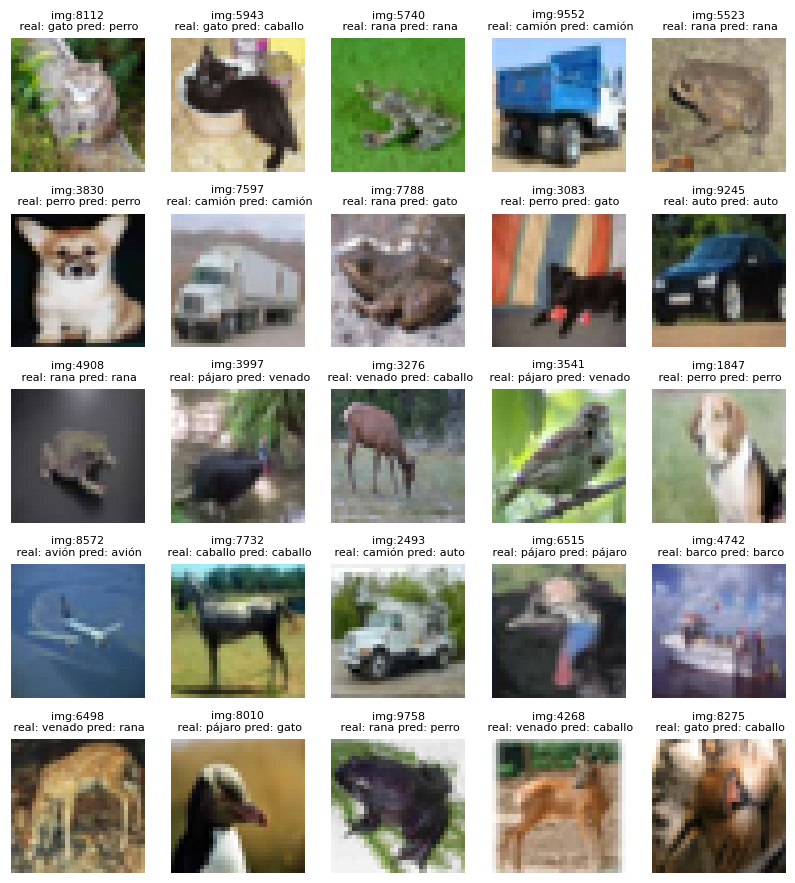

In [35]:
h = 5  # alto de la cuadrícula
w = 5  # ancho de la cuadrícula
fig, axs = plt.subplots(h, w, figsize=(w+5, h+6))  # creación de la cuadrícula
for i in range(h):  # recorre las filas
    for j in range(w):  # recorre las columnas
        ex = np.random.randint(len(imgs_test))
        Xin = X_test[ex].reshape(1, 32*32*3)
        Ypred = red.predict(Xin).reshape(10)
        lpred = np.argmax(Ypred)

        title = "img:" + str(ex) + "\n real: " + str(nombres[int(labs_test[ex])]) + " pred: " + str(nombres[lpred])
        axs[i, j].set_title(title, fontsize=8)  # ajustar el tamaño de la letra
        axs[i, j].axis('off')  # quita las rallitas de los ejes
        axs[i, j].imshow(imgs_test[ex])


#

### EarlyStopping

En el siguiente código, se utilizó el método EarlyStopping con el parámetro patience = 4. Este método se encarga de monitorear el entrenamiento en cada iteración y se detiene cuando no se detecta una mejora en la puntuación después de un cierto número (x) de iteraciones especificado por el hiperparámetro patience. Sin embargo, en este caso en particular puede no ser recomendable utilizarlo, ya que el número reducido de épocas podría limitar la búsqueda de coincidencias y no mostrar el verdadero potencial del entrenamiento (en este caso en particular). No obstante, se recomienda utilizarlo especialmente cuando se tiene un entrenamiento más estable y/o con un mayor número de épocas.

In [12]:
from keras.api._v2.keras import callbacks
es = keras.callbacks.EarlyStopping(monitor='val_loss',patience=4)
hist_rege = red.fit(X_train, Y_train, # entrenamiento de la red
        epochs=e1, # cantidad de épocas
        batch_size=b1,
        validation_data=(X_test,Y_test),# tamaño del batch
        callbacks=(es) # conjunto de validación
       )

Epoch 1/20
391/391 [==============================] - 2s 6ms/step - loss: 1.2566 - accuracy: 0.5505 - val_loss: 1.2984 - val_accuracy: 0.5391
Epoch 2/20
391/391 [==============================] - 2s 5ms/step - loss: 1.2493 - accuracy: 0.5534 - val_loss: 1.2981 - val_accuracy: 0.5356
Epoch 3/20
391/391 [==============================] - 2s 5ms/step - loss: 1.2343 - accuracy: 0.5598 - val_loss: 1.3347 - val_accuracy: 0.5220
Epoch 4/20
391/391 [==============================] - 2s 5ms/step - loss: 1.2207 - accuracy: 0.5639 - val_loss: 1.2943 - val_accuracy: 0.5411
Epoch 5/20
391/391 [==============================] - 2s 6ms/step - loss: 1.2092 - accuracy: 0.5665 - val_loss: 1.2939 - val_accuracy: 0.5320
Epoch 6/20
391/391 [==============================] - 2s 5ms/step - loss: 1.2006 - accuracy: 0.5700 - val_loss: 1.2953 - val_accuracy: 0.5365
Epoch 7/20
391/391 [==============================] - 2s 5ms/step - loss: 1.1929 - accuracy: 0.5742 - val_loss: 1.2878 - val_accuracy: 0.5388
Epoch 

### Modelo 5

En el siguiente modelo se utilizó la función de activación ReLU. A diferencia de la función tanh, la función ReLU produce valores no negativos, lo que significa que su rango está entre [0, +infinito]. Esto ayudó a mitigar el problema del desvanecimiento del gradiente, que se explicará con más detalle en el siguiente modelo de entrenamiento. En este caso, también se utilizó el optimizador Adam, que a diferencia de SGD, es un optimizador de aprendizaje adaptativo. La principal diferencia entre estos dos optimizadores es que SGD tiene un aprendizaje constante, actualizando los pesos del modelo en función del gradiente de la función de pérdida en cada paso. Por otro lado, Adam es un optimizador más avanzado que tiene aprendizaje adaptativo para actualizar los pesos del modelo. Ajusta automáticamente la tasa de aprendizaje para cada parámetro del modelo.

In [13]:
np.random.seed(30) # semilla para reproducibilidad
tf.random.set_seed(30) # semilla para reproducibilidad

red = keras.Sequential() # modelo secuencial

red.add(keras.layers.Dense(x1, input_dim=N, activation='relu')) # capa oculta 1

red.add(keras.layers.Dense(x2, activation='relu')) # capa oculta 2

red.add(keras.layers.Dense(x3, activation='relu')) # capa oculta 3


red.add(keras.layers.Dense(C, activation='softmax')) # capa de salida

red.summary() # imprime un resumen de la red

red.compile( # compilación de la red
    loss='categorical_crossentropy', # función de pérdida
    optimizer='adam', # optimizador
    metrics=['accuracy'] # métrica a mostrar
)

hist_reg5 = red.fit(X_train, Y_train, # entrenamiento de la red
        epochs=e1, # cantidad de épocas
        batch_size=b1, # tamaño del batch
        validation_data=(X_test,Y_test) # conjunto de validación
       )

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 530)               1628690   
                                                                 
 dense_15 (Dense)            (None, 400)               212400    
                                                                 
 dense_16 (Dense)            (None, 160)               64160     
                                                                 
 dense_17 (Dense)            (None, 10)                1610      
                                                                 
Total params: 1,906,860
Trainable params: 1,906,860
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
391/391 [==============================] - 4s 6ms/step - loss: 1.8865 - accuracy: 0.3160 - val_loss: 1.7091 - val_accuracy: 0.3765
Epoch 2/20
391/391 [==============

# Evaluación

Los gráficos muestran la evolución de la pérdida en los modelos durante el entrenamiento. En el gráfico, el color azul representa la pérdida en el conjunto de entrenamiento, mientras que el otro color representa la pérdida en el conjunto de prueba (validación).

La pérdida es una medida que indica qué tan alejadas están las predicciones del modelo de los valores reales. En el entrenamiento, el objetivo es minimizar esta pérdida, lo que implica que el modelo se está ajustando cada vez más a los datos de entrenamiento.

Observando los gráficos, podemos notar lo siguiente:
- Si la pérdida en el conjunto de entrenamiento disminuye rápidamente y se acerca a cero, mientras que la pérdida en el conjunto de prueba también disminuye, indica que el modelo está aprendiendo correctamente y generalizando bien a nuevos datos.
- Si la pérdida en el conjunto de entrenamiento disminuye rápidamente pero la pérdida en el conjunto de prueba se mantiene alta, puede ser un signo de sobreajuste. Esto significa que el modelo está memorizando los datos de entrenamiento y no es capaz de generalizar a nuevos datos.
- Si la pérdida en ambos conjuntos disminuye lentamente o se estabiliza, podría indicar que el modelo ha alcanzado su límite de rendimiento y no hay mucho más que pueda mejorar.

### Modelo 1

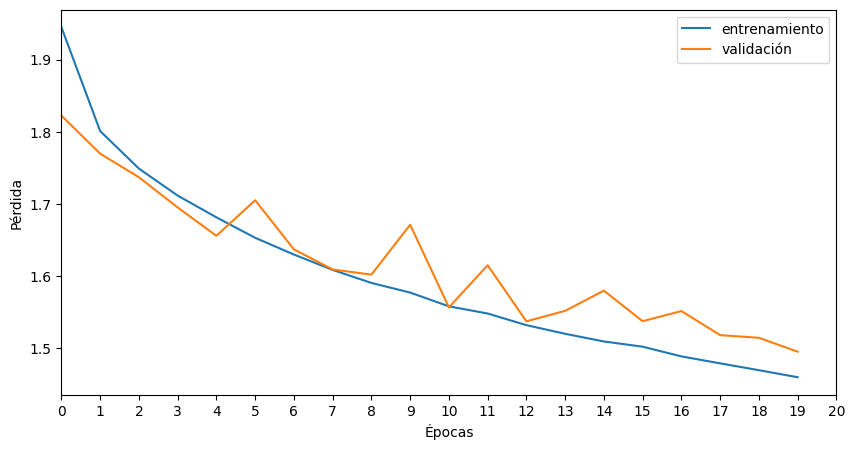

In [14]:
plt.figure(figsize=(10,5)) # tamaño del gráfico
plt.plot(hist_reg1.history['loss'], label='entrenamiento') # pérdida en el entrenamiento
plt.plot(hist_reg1.history['val_loss'], label='validación') # pérdida en la validación
plt.xlabel('Épocas') # etiqueta del eje x
plt.ylabel('Pérdida') # etiqueta del eje y
plt.legend() # muestra la leyenda

# Configuración de las marcas en el eje x
plt.xticks(range(0, 21, 1)) # valores enteros del 0 al 20
plt.xlim(0, 20) # límites del eje x

plt.show() # muestra el gráfico


### Modelo 2

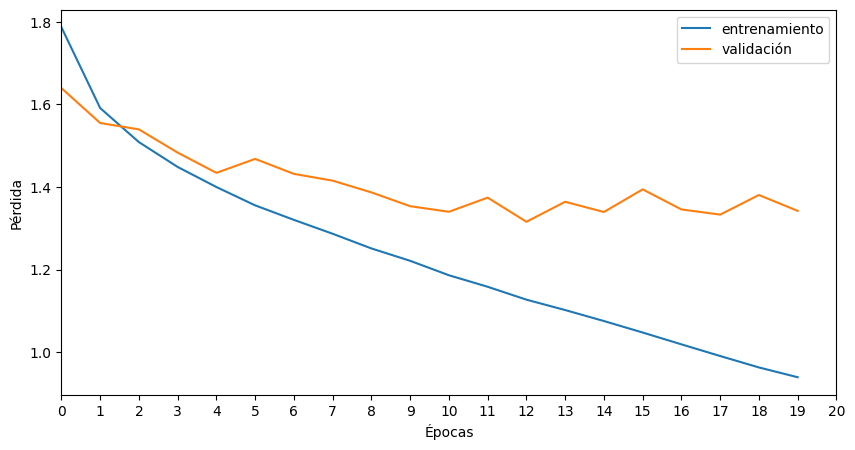

In [15]:
plt.figure(figsize=(10,5)) # tamaño del gráfico
plt.plot(hist_reg2.history['loss'], label='entrenamiento') # pérdida en el entrenamiento
plt.plot(hist_reg2.history['val_loss'], label='validación') # pérdida en la validación
plt.xlabel('Épocas') # etiqueta del eje x
plt.ylabel('Pérdida') # etiqueta del eje y
plt.legend() # muestra la leyenda

# Configuración de las marcas en el eje x
plt.xticks(range(0, 21, 1)) # valores enteros del 0 al 20
plt.xlim(0, 20) # límites del eje x

plt.show() # muestra el gráfico

### Modelo 3

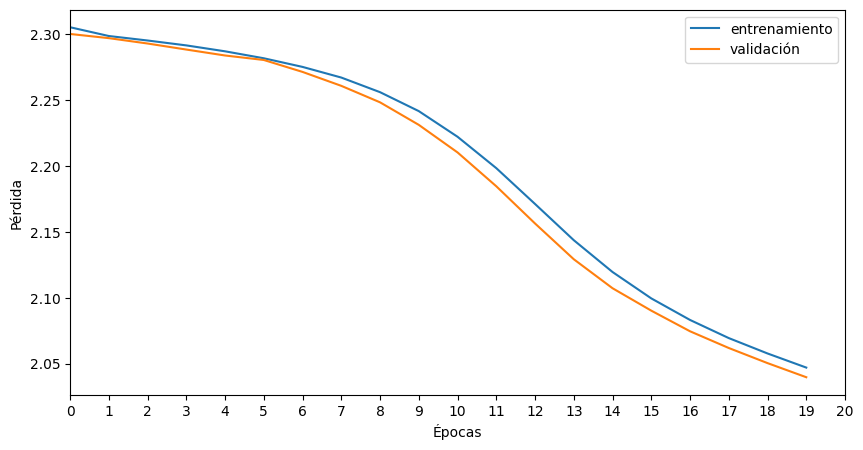

In [16]:
plt.figure(figsize=(10,5)) # tamaño del gráfico
plt.plot(hist_reg3.history['loss'], label='entrenamiento') # pérdida en el entrenamiento
plt.plot(hist_reg3.history['val_loss'], label='validación') # pérdida en la validación
plt.xlabel('Épocas') # etiqueta del eje x
plt.ylabel('Pérdida') # etiqueta del eje y
plt.legend() # muestra la leyenda

# Configuración de las marcas en el eje x
plt.xticks(range(0, 21, 1)) # valores enteros del 0 al 20
plt.xlim(0, 20) # límites del eje x

plt.show() # muestra el gráfico

### Modelo 4

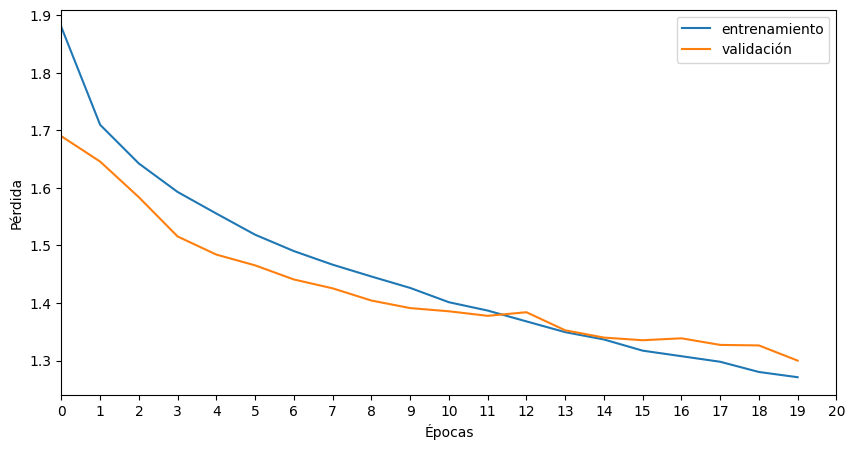

In [17]:
plt.figure(figsize=(10,5)) # tamaño del gráfico
plt.plot(hist_reg4.history['loss'], label='entrenamiento') # pérdida en el entrenamiento
plt.plot(hist_reg4.history['val_loss'], label='validación') # pérdida en la validación
plt.xlabel('Épocas') # etiqueta del eje x
plt.ylabel('Pérdida') # etiqueta del eje y
plt.legend() # muestra la leyenda

# Configuración de las marcas en el eje x
plt.xticks(range(0, 21, 1)) # valores enteros del 0 al 20
plt.xlim(0, 20) # límites del eje x

plt.show() # muestra el gráfico

### Modelo 5

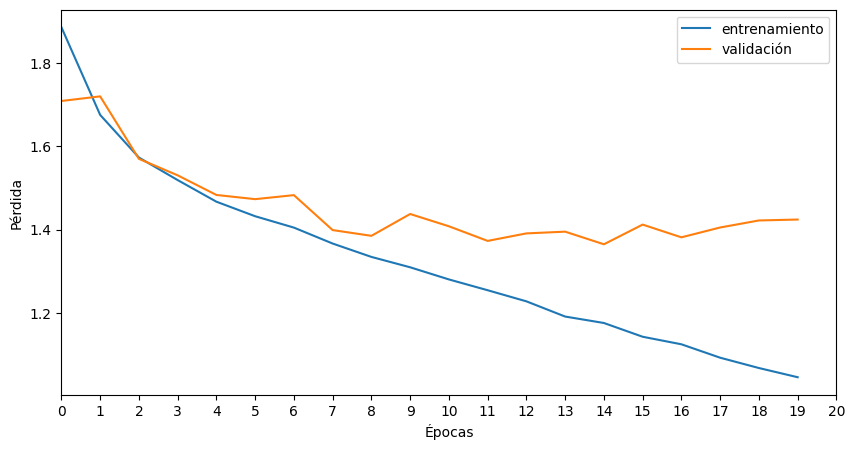

In [18]:
plt.figure(figsize=(10,5)) # tamaño del gráfico
plt.plot(hist_reg5.history['loss'], label='entrenamiento') # pérdida en el entrenamiento
plt.plot(hist_reg5.history['val_loss'], label='validación') # pérdida en la validación
plt.xlabel('Épocas') # etiqueta del eje x
plt.ylabel('Pérdida') # etiqueta del eje y
plt.legend() # muestra la leyenda

# Configuración de las marcas en el eje x
plt.xticks(range(0, 21, 1)) # valores enteros del 0 al 20
plt.xlim(0, 20) # límites del eje x

plt.show() # muestra el gráfico

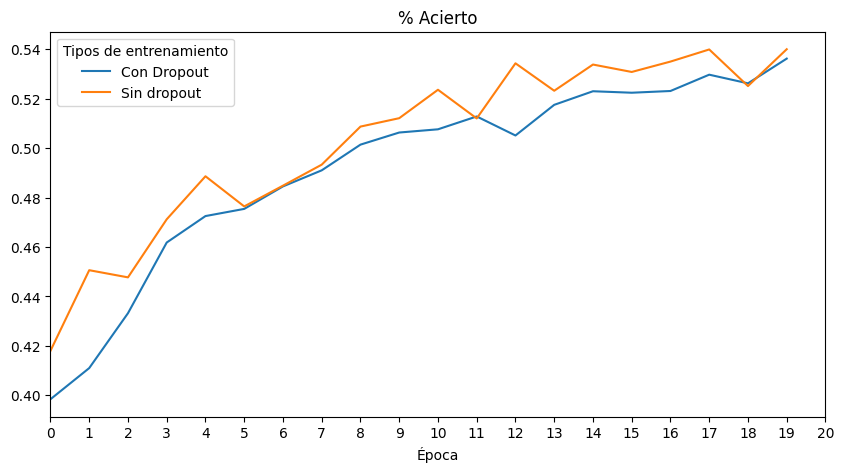

In [19]:
plt.figure(figsize=(10,5))
plt.plot(hist_reg4.history['val_accuracy'], label = 'Con Dropout')
plt.plot(hist_reg2.history['val_accuracy'], label = 'Sin dropout')
plt.title('% Acierto')
plt.xlabel('Época')
plt.legend(title='Tipos de entrenamiento')
plt.xticks(range(0, 21, 1)) # valores enteros del 0 al 20
plt.xlim(0, 20)

plt.show()

# Despliegue

Aquí se muestra una cuadrícula utilizando como base el mejor modelo en función de las evaluaciones, en este caso el modelo sería el modelo 2. Sin embargo, debido a la baja precisión del modelo, no sería recomendable ponerlo en producción.

1/1 [==============================] - 0s 20ms/step


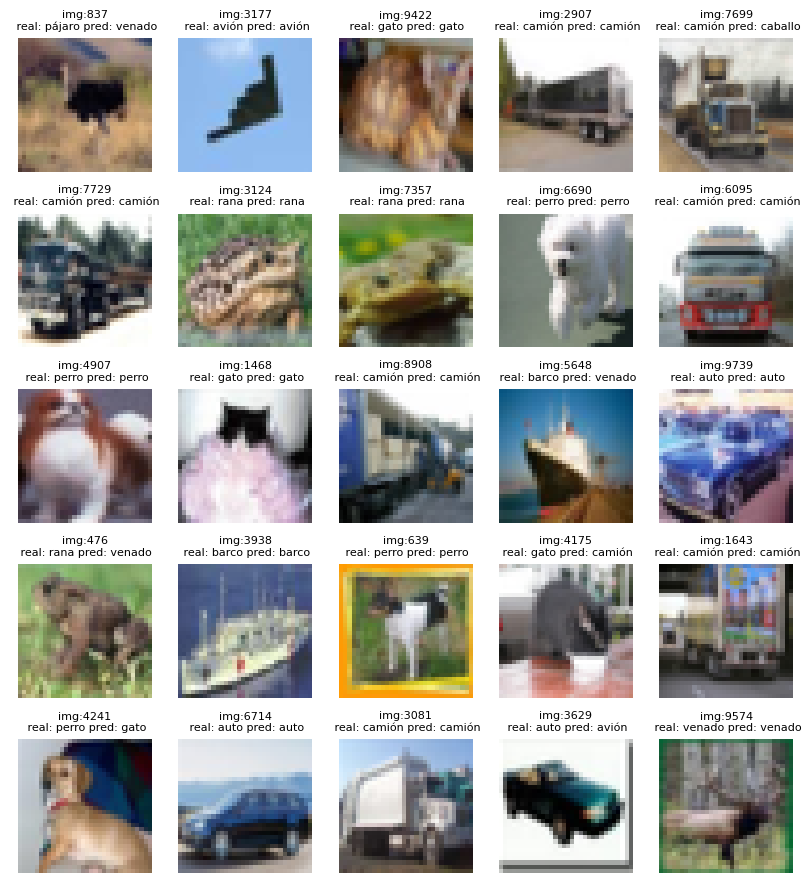

In [34]:
h = 5  # alto de la cuadrícula
w = 5  # ancho de la cuadrícula
fig, axs = plt.subplots(h, w, figsize=(w+5, h+6))  # creación de la cuadrícula
for i in range(h):  # recorre las filas
    for j in range(w):  # recorre las columnas
        ex = np.random.randint(len(imgs_test))
        Xin = X_test[ex].reshape(1, 32*32*3)
        Ypred = red.predict(Xin).reshape(10)
        lpred = np.argmax(Ypred)

        title = "img:" + str(ex) + "\n real: " + str(nombres[int(labs_test[ex])]) + " pred: " + str(nombres[lpred])
        axs[i, j].set_title(title, fontsize=8)  # ajustar el tamaño de la letra
        axs[i, j].axis('off')  # quita las rallitas de los ejes
        axs[i, j].imshow(imgs_test[ex])